# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 The new car market in general is characterized by standardized pricing schemes. Automakers leverage market segmentation and straightforward cost accounting to determine the prices of their car catalogs. Prices are generally consistent across dealerships and even within the same segments across different brands. Furthermore, age of the car, Km driven and other variables, are not significant factors in the pricing of new cars. However, the dynamics change significantly in the used car market, where these additional factors become crucial. This complexity and lack of transparency in pricing make it challenging for both buyers and sellers to navigate the market effectively.

### **The objective:**

 - What is the intended goal?

In light of the intricate nature of the used car market, there is a pressing need to develop a reliable machine learning (ML) model that can accurately predict car prices. Such a model would enable transparency and address the challenges faced by both companies and buyers.

### **The key questions:**

- What are the key questions that need to be answered?

What are the key factors influencing car prices in the used car market? Understanding the significant variables that impact car prices, such as the car's age, mileage, condition, brand, model, and market demand, is essential for developing an accurate prediction model.

How can we incorporate both quantitative and qualitative factors into the model? While quantitative factors like age and mileage can be easily quantified, qualitative factors like the car's condition require a more subjective assessment. Developing methods to incorporate such subjective factors into the model is crucial for capturing the holistic pricing dynamics.

How can we ensure the accuracy and reliability of the data used for training the model? The success of an ML model depends on the quality and representativeness of the data used for training. Ensuring accurate and reliable data sources, verifying the credibility of the information, and addressing any errors or inconsistencies are vital steps in building a robust model.

What is the appropriate model architecture and algorithm to achieve accurate predictions? Selecting the right ML model architecture, such as regression-based models and the appropriate algorithm is critical for achieving accurate and reliable price predictions. 

### **The problem formulation**:

- What is it that we are trying to solve using data science?

By incorporating multiple factors, including Kilomters driven, age of the car, no of previous owners, as well as buyer needs and desires such as fuel type, transmission, power number of seat etc, the ML model can bring clarity how the segmentation of buyers needs and the condition and care of the car play into the price. Cars4U can leverage the model's insights to identify high-yielding opportunities in the market while offering fair and competitive prices to buyers. This would lead to a more efficient and balanced used car market, benefiting both sellers and buyers alike.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [72]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For looking at missing values
import missingno as msno

# For processing data
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve




### **Let us load the data**

In [2]:
#load data from csv file
df = pd.read_csv("used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


***Observation:*** Column "S.No." seems to be an index since it increments consecutively plus it coincides with the total number of entries, for which it doesnt contribute to the analysis and should be droped.

In [5]:
df = df.drop(columns='S.No.')

***Lets check for unique values in categorical variables***

In [6]:
# Check unique values and their counts for categorical variables
categorical_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for column in categorical_columns:
    print(f'\nUnique values for {column}:')
    print(df[column].value_counts().count())


Unique values for Name:
2041

Unique values for Location:
11

Unique values for Fuel_Type:
5

Unique values for Transmission:
2

Unique values for Owner_Type:
4


***Observations:*** The 'Name' variable in the dataset initially presented a high degree of uniqueness. However, upon closer inspection, it became evident that the 'Name' is structured typically comprising the car's brand or automaker, followed by the model and a combination of trim level and/or other characteristics.

To simplify this complexity and extract potentially valuable information, we split the 'Name' column into two separate columns: 'Brand' and 'Model'. This operation significantly reduced the number of unique values in these new columns.

In [7]:
# Split the 'Name' column into 'Brand' and 'Model'
df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])
df['Model'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Drop the original 'Name' column
df = df.drop(columns='Name')
df = df.drop(columns='Model')
# Display the first few rows of the dataframe to confirm
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi


***Observations:*** The separation of 'Brand' and 'Model' could provide more meaningful insights for our predictive model. It is plausible that certain brands or models may correlate with higher or lower prices in the used car market. This transformation, therefore, could enhance the predictive power of our model.

In [8]:
unique_brands = df["Brand"].nunique()
print(f'There are {unique_brands} automaker car brands')

There are 33 automaker car brands


***Observations:*** converting the 'Owner_Type' column to a numerical format can be beneficial for further analysis as many algorithms can handle numerical data better than categorical data. We can map 'First' to 1, 'Second' to 2, 'Third' to 3, and 'Fourth & Above' to 4. 

In [9]:
# Convert 'Owner_Type' to numerical values
owner_type_mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}
df['Owner_Type'] = df['Owner_Type'].map(owner_type_mapping)
# Display the first few rows of the dataframe to confirm
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,NaN,17.74,Audi


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [10]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365,3.254,1996.00,2011.000,2014.00,2016.000,2019.00
Kilometers_Driven,7253.0,58699.063,84427.721,171.00,34000.000,53416.00,73000.000,6500000.00
Owner_Type,7253.0,1.202,0.457,1.00,1.000,1.00,1.000,4.00
Mileage,7251.0,18.142,4.562,0.00,15.170,18.16,21.100,33.54
Engine,7207.0,1616.573,595.285,72.00,1198.000,1493.00,1968.000,5998.00
Power,7078.0,112.765,53.494,34.20,75.000,94.00,138.100,616.00
Seats,7200.0,5.280,0.809,2.00,5.000,5.00,5.000,10.00
New_price,1006.0,22.780,27.759,3.91,7.885,11.57,26.042,375.00
Price,6019.0,9.479,11.188,0.44,3.500,5.64,9.950,160.00


***Observation:*** Upon examining the "Kilometers_Driven" variable, a discrepancy has been identified. It appears highly improbable for a car to have been driven for 6,500,000 km, suggesting that this figure could be a typographical error. Such an anomaly is likely causing a skew in the distribution, distorting the overall data representation. Therefore, it's crucial that we investigate this matter further to ensure the accuracy and reliability of our analysis.

Also Mileage present 0 as minimum value, which seem strange for a used car to give out 0 km per liter, lets check the number of "zero km per liter" to check if its a missing value not detected previously.

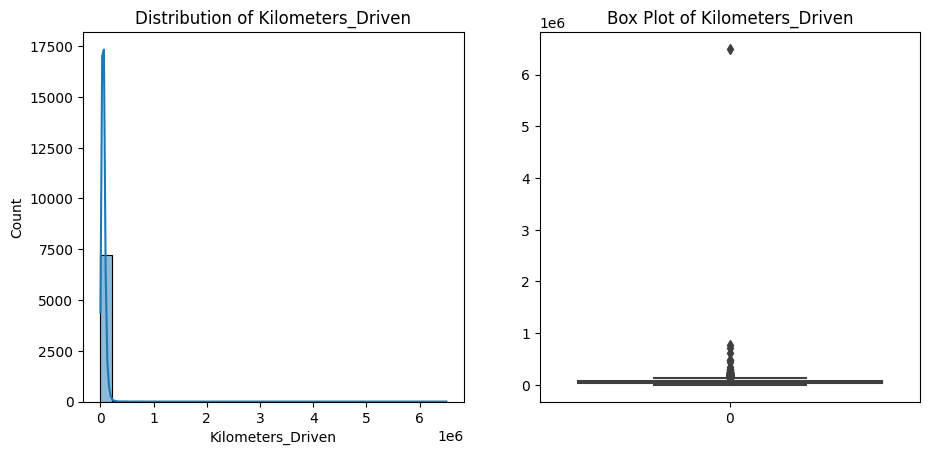

In [11]:
plt.figure(figsize=(10.8, 4.8))

km_analysis = 'Kilometers_Driven'

# Let's plot a histogram of Kilometers_Driven to examine its distribution
plt.subplot(1, 2, 1)
sns.histplot(df[km_analysis], kde=True, bins=30)
plt.title(f'Distribution of {km_analysis}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(df[km_analysis])
plt.title(f'Box Plot of {km_analysis}')

plt.show()

***Observations:*** It's evident that while there are several outliers below the 1 million km mark, these values appear to fall within reasonable bounds. The handling of these outliers will be determined based on the algorithm we choose to implement later. However, there is one exceptional outlier that seems to be the result of an error. 

In [12]:
# Display rows where 'Kilometers_Driven' is greater than 1,000,000
df[df['Kilometers_Driven'] > 1000000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Brand
2328,Chennai,2017,6500000,Diesel,Automatic,1,15.97,2993.0,258.0,5.0,NaN,65.0,BMW


**Observation** As we suspected, it seems highly unlikely for a car manufactured in 2017 to have been driven for 6,500,000 km. This is likely a data entry error. We will proceed to remove it

In [13]:
# Remove the row with the outlier in 'Kilometers_Driven'
df = df[df['Kilometers_Driven'] <= 1000000]

# Check the shape of the dataframe
df.shape

(7252, 13)

lets check for number of "zero km per liter"

In [14]:
## Identify instances where 'Mileage' is 0
zero_mileage = df[df['Mileage'] == 0].shape[0]
print(f'There are {zero_mileage}  "zero km per liter" in column Kilometers_Driven')

There are 81  "zero km per liter" in column Kilometers_Driven


We will replace "0" with the median since introduces the fraction of errors is small relative to the overall data and the median introdces the less noise.

In [15]:
# Substitute "0" with Nan to later fill out with median
zero_mileage = df['Mileage'] == 0
df.loc[zero_mileage, 'Mileage'] = np.nan
# Impute NaN values with the median
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)


### **Lets continue with the Univariate Analysis**

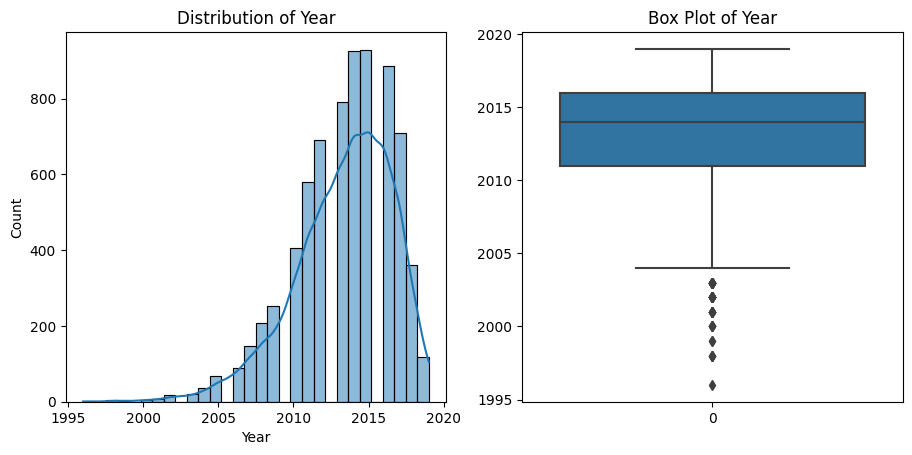

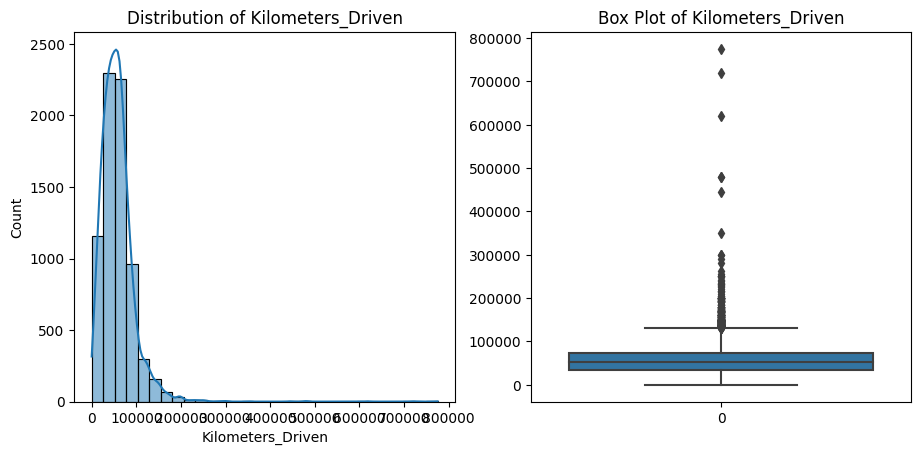

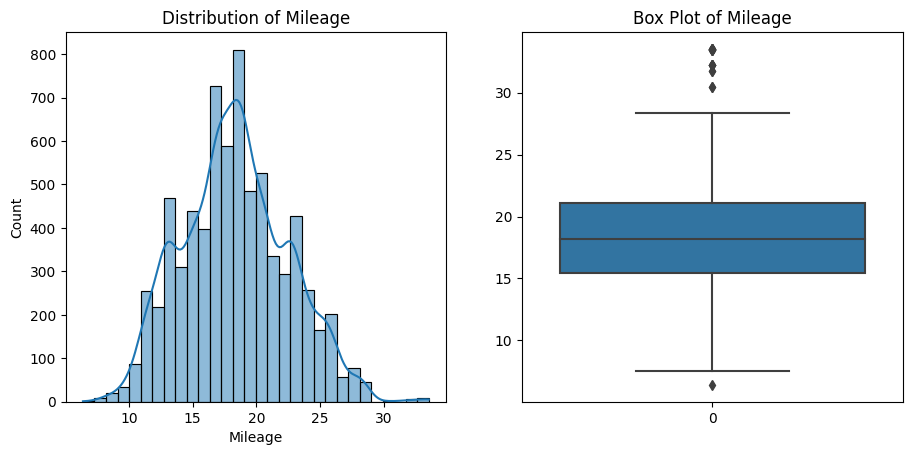

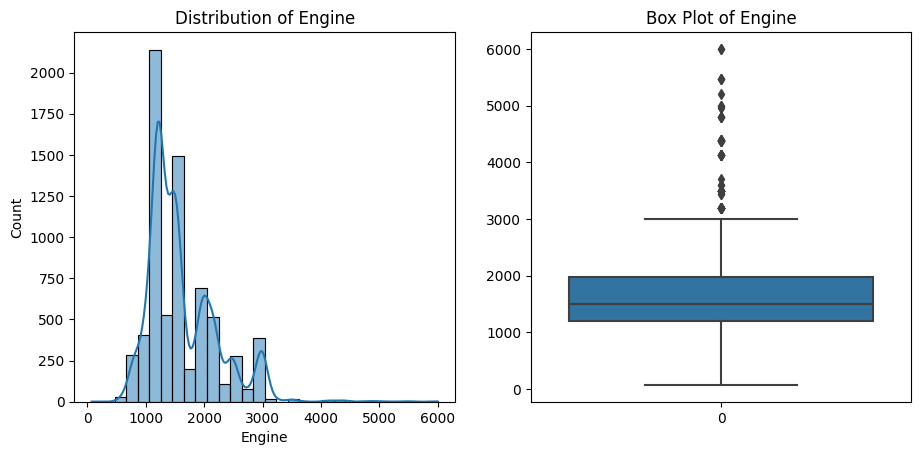

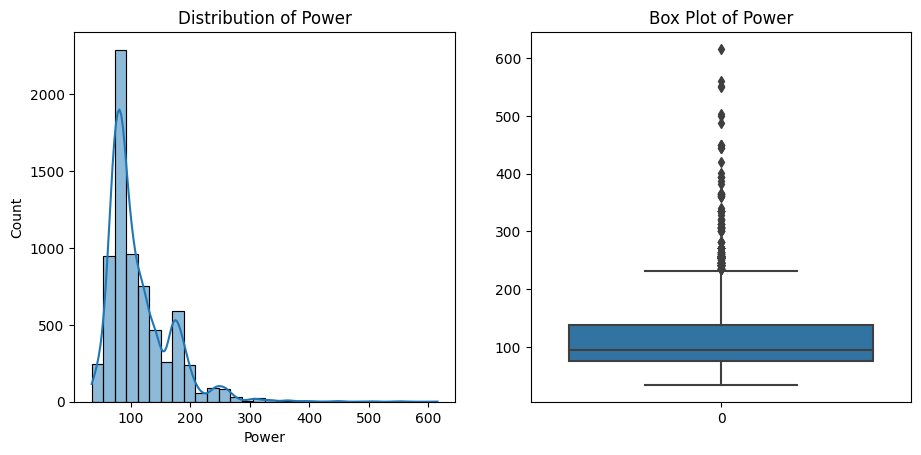

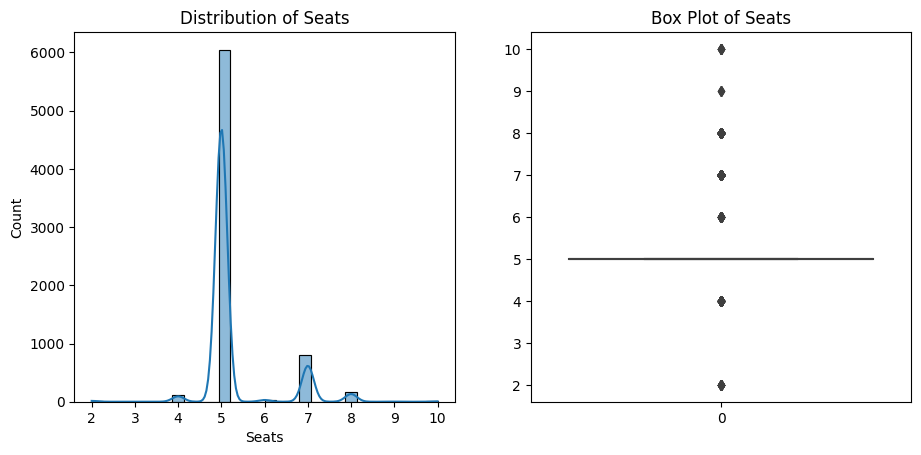

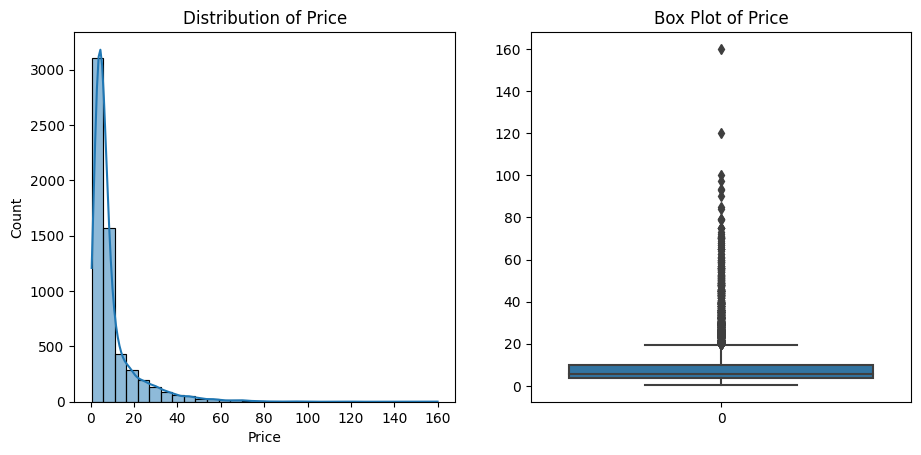

In [16]:
# Create histograms and box plots for each numerical variable
for column in ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']:
    plt.figure(figsize=(10.8, 4.8))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    
    plt.show()


**Year:** : The range of cars year is 21 years from 1998 to 2021 with an average manufacturing year of 2013, and altough there are a few outliers towards the lower end, indicating some very old cars in the dataset the overall data skeews to the right indicating fairly newers cars, additionally the 25th percentile indicates 3/4 of cars are at least 2011 or newer.

**Kilometers_driven:** The 95th percentile of the data is at 120,000km, which means that only 5% of all recorded distances exceed this value. This indicates that extremely high mileage, beyond 120,000km, is quite rare in our dataset. However, the standard deviation is relatively high at 37,875. This suggests that the distances driven by the cars in our dataset vary significantly from the average. Further, the data exhibits a positive skewness, indicating that there are a number of measurements that are significantly larger than the rest. This skewness, suggests a distribution with a sharp peak and heavy tails. This is indicative of a high presence of outliers.

**Mileage:** The mean and median are relatively close with an average of about 18.14 km per liter., suggesting that the data is not heavily skewed. The variability in the data is relatively moderate, as indicated by the standard deviation, variance

**Engine:** he engine sizes range from 72 to 5998 cc, with an average of about 1616 cc. Only 5% of all measurements are greater than 2,982, suggesting that very few data points are extremely high the presence of outliers is high which could be explained by a few high performance cars or large SUV. The mean and median are relatively close, suggesting that the data is not heavily skewed. The variability in the data is relatively high, as indicated by the standard deviation, variance.

**Owner_Type:** The cars have between 1 and 4 previous owners, with an average of about 1.2. This indicates that most cars have only had one previous owner.

**Power:** The 'Power' variable is also right-skewed, indicating that most of the cars have a power less than 150 bhp. Just as engine 0nly 5% of all measurements are greater than 204, suggesting that very few data points are extremely high which suggest moderate horse power, with only a few high power cars which could be high performance car or large SUVs.

**Price:** The price of the used cars ranges from 0.44 to 160 (in INR 100,000), with an average of about 9.48. Only 5% of all measurements are greater than 32.446 suggesting that very few data points are extremely high which suggest with heavy tails and a sharp peak, suggesting a high presence of outliers some transformation may be needed.

#### **Univariate Analysis Categorical Variables**

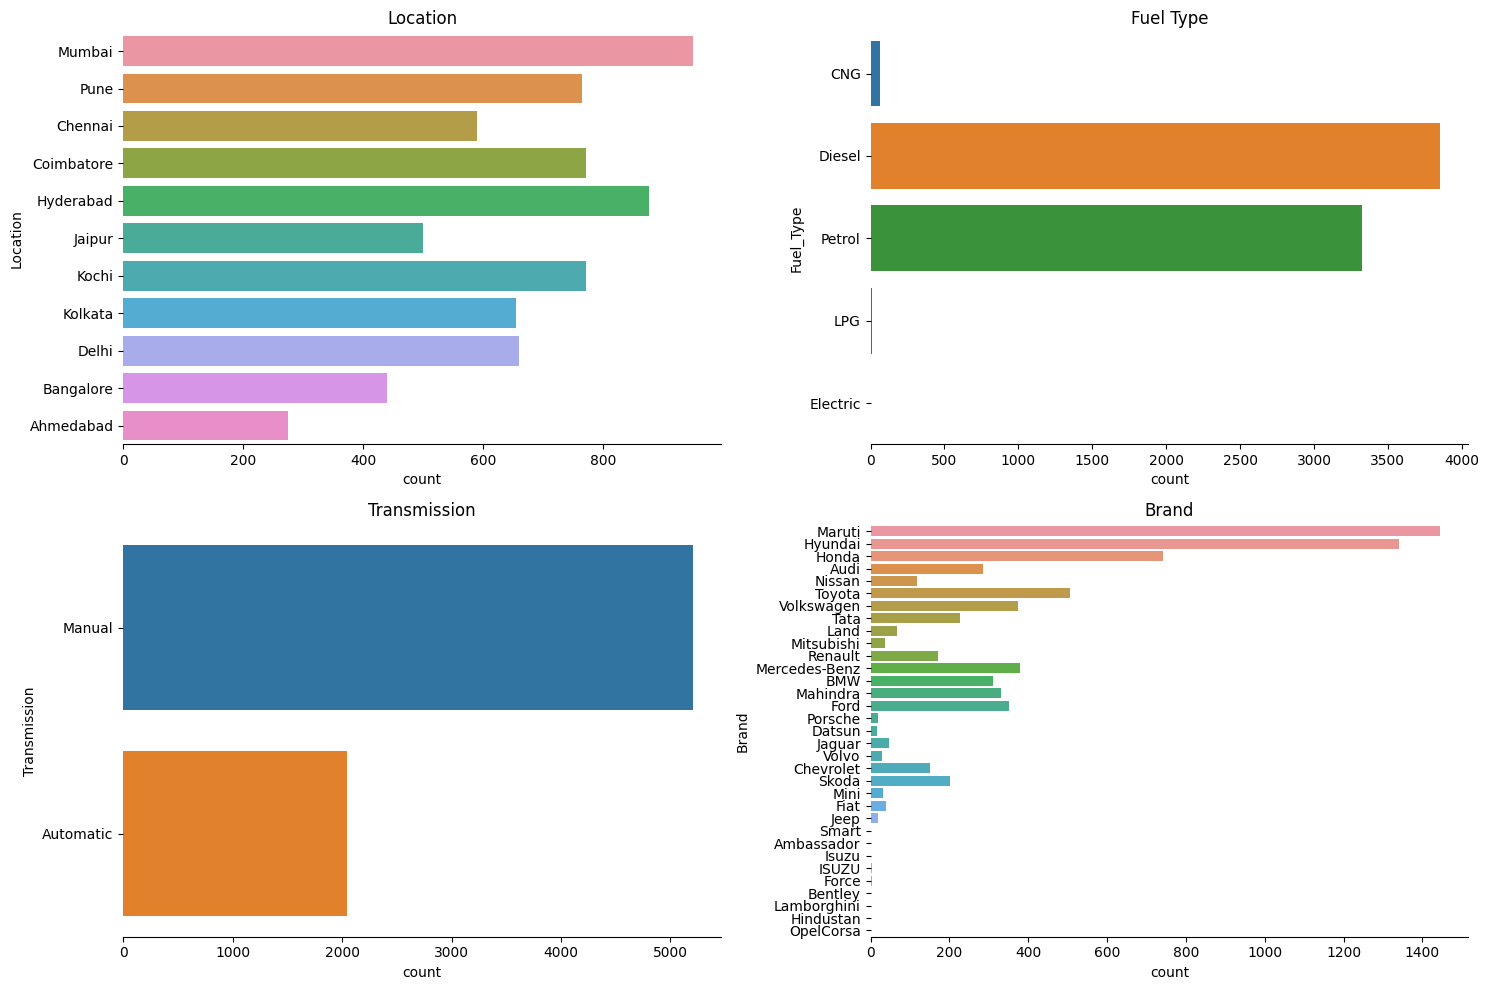

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.despine(left=True)
# Plot a bar plot for each variable
sns.countplot(data=df, y='Location', ax=axes[0, 0])
sns.countplot(data=df, y='Fuel_Type', ax=axes[0, 1])
sns.countplot(data=df, y='Transmission', ax=axes[1, 0])
sns.countplot(data=df, y='Brand', ax=axes[1, 1])
# Set the titles
axes[0, 0].set_title('Location')
axes[0, 1].set_title('Fuel Type')
axes[1, 0].set_title('Transmission')
axes[1, 1].set_title('Brand')
# Show the plot
plt.tight_layout()

**Location**: The dataset contains cars from various locations, with the highest number from Mumbai, followed by Hyderabad and Kochi respectively.

**Fuel_Type**: Most cars in the dataset are either Diesel or Petrol, with very few CNG, LPG or Electric cars.

**Transmission**': The majority of cars have a Manual transmission, with fewer cars having an Automatic transmission.

**Brand**: The dataset contains cars from various brands, with Maruti, hyundai and Honda representing 50% ot total values

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

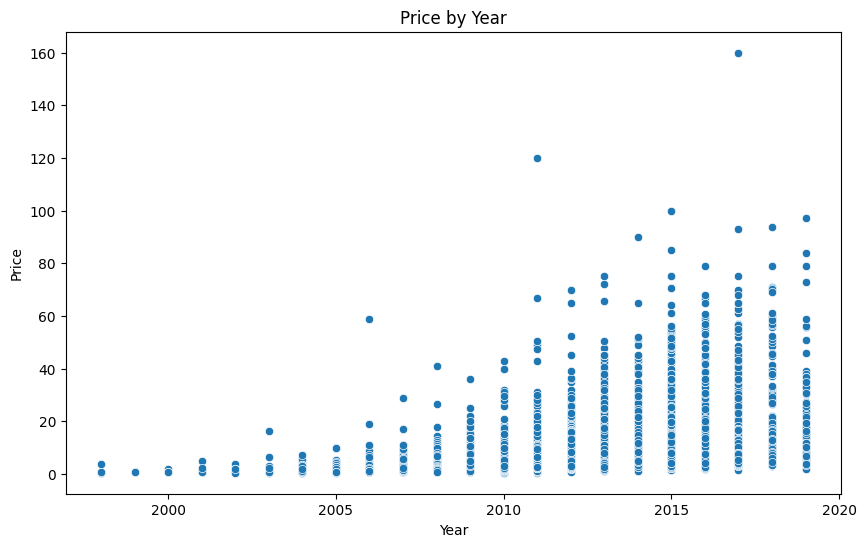

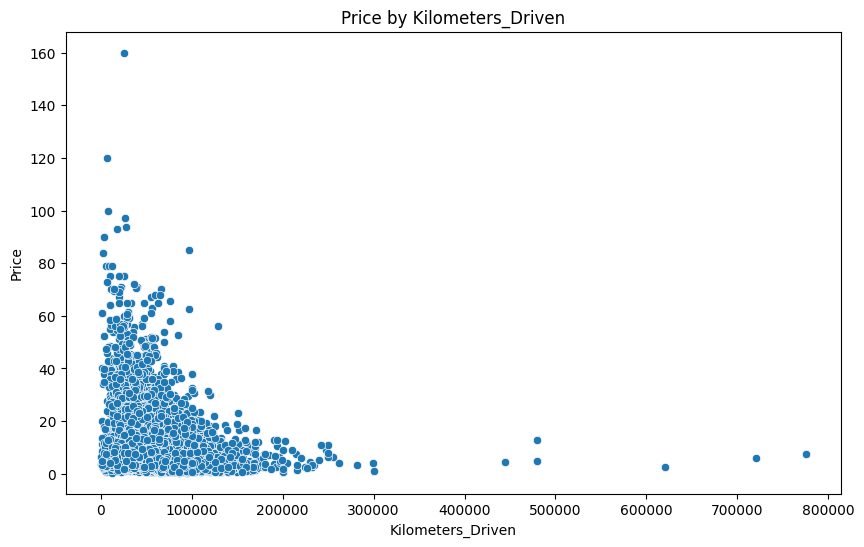

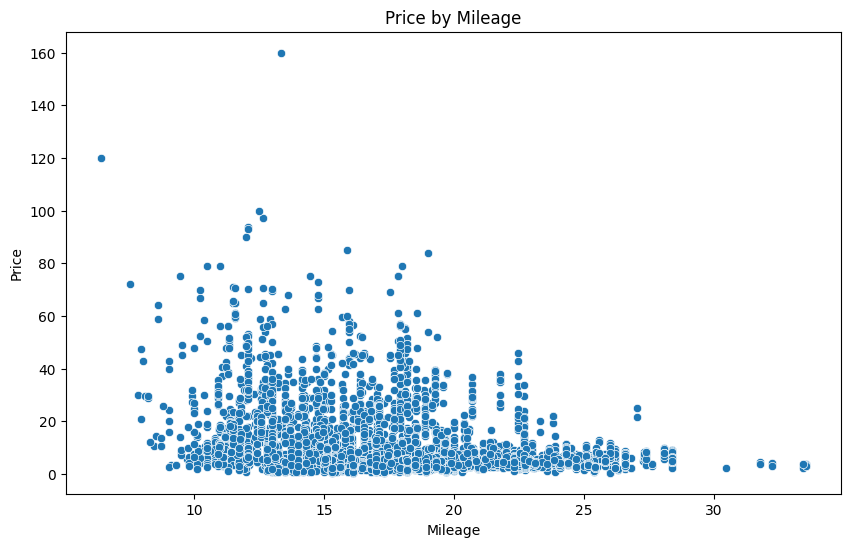

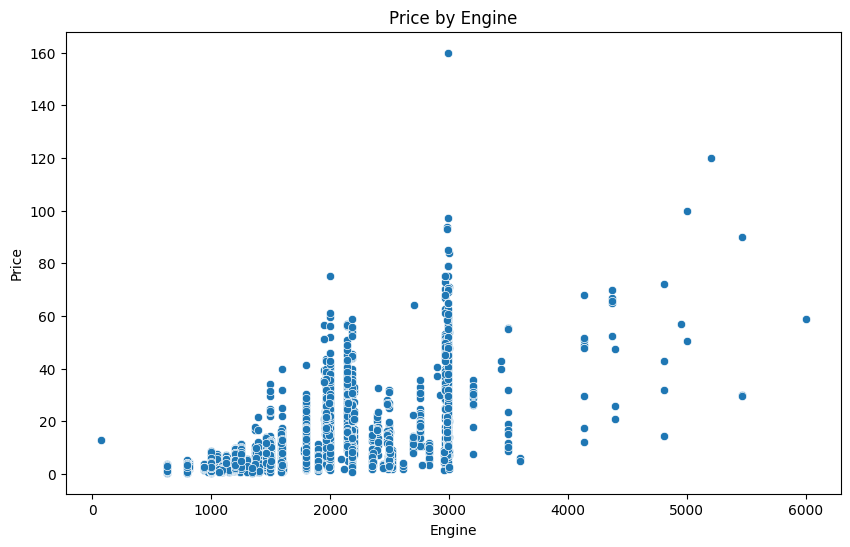

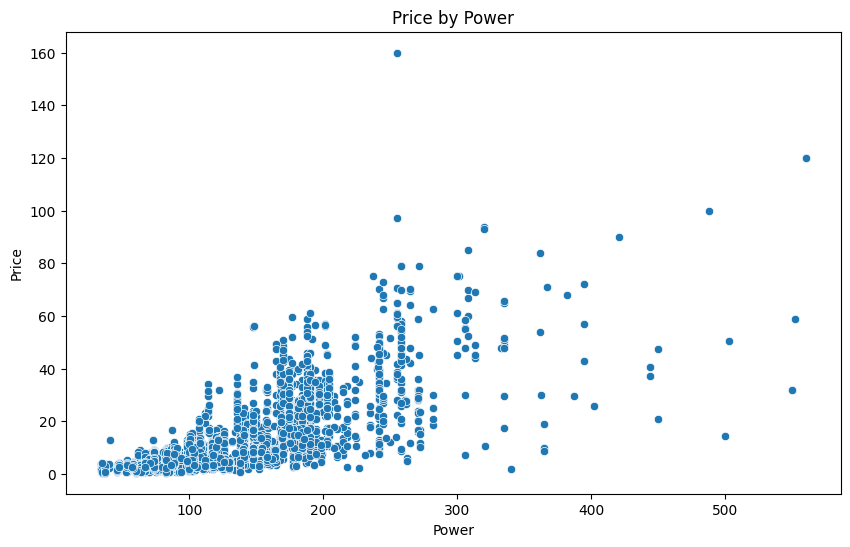

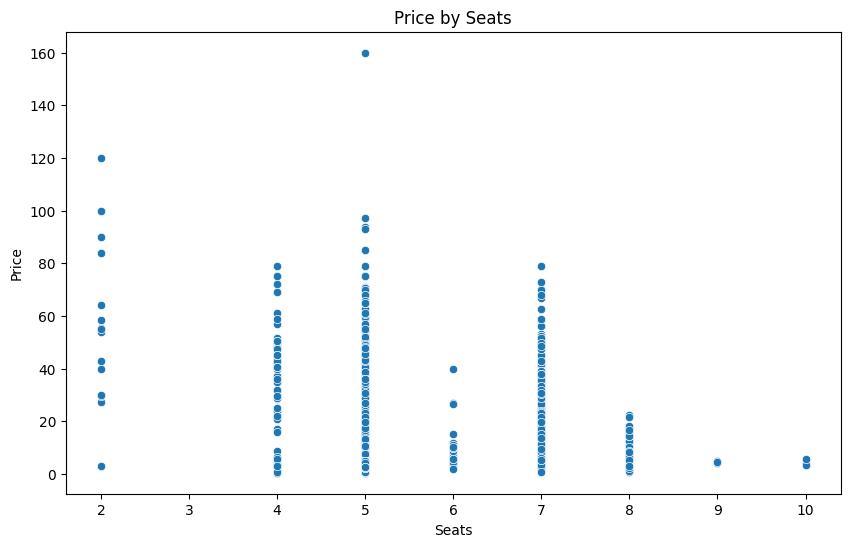

In [18]:
# Create scatter plots of 'Price' against the numerical variables
for column in ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column], y=df['Price'])
    plt.title(f'Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

**Year:** There seems to be a positive correlation between the year of manufacture and the price of the car. Newer cars tend to be more expensive.

**Kilometers_Driven:** There doesn't seem to be a clear relationship between the number of kilometers driven and the price of the car. However, there are a few cars with very high mileage that are relatively cheap wich may be explained by their age and condition. Conversely, certain low-mileage cars command high prices due to factors like collectible or limited edition status, which aren't solely tied to mileage. Thus, factors beyond kilometers driven, such as rarity, demand, and overall condition could influence car prices

**Mileage:** There is a slight negative correlation between the mileage of the car and its price. Cars with higher mileage tend to be cheaper.

**Engine:** There is a positive correlation between the engine size and the price of the car. Cars with larger engines tend to be more expensive.

**Power:** There is a strong positive correlation between the power of the car and its price. More powerful cars tend to be more expensive.

**Seats:** There doesn't seem to be a clear relationship between the number of seats and the price of the car.

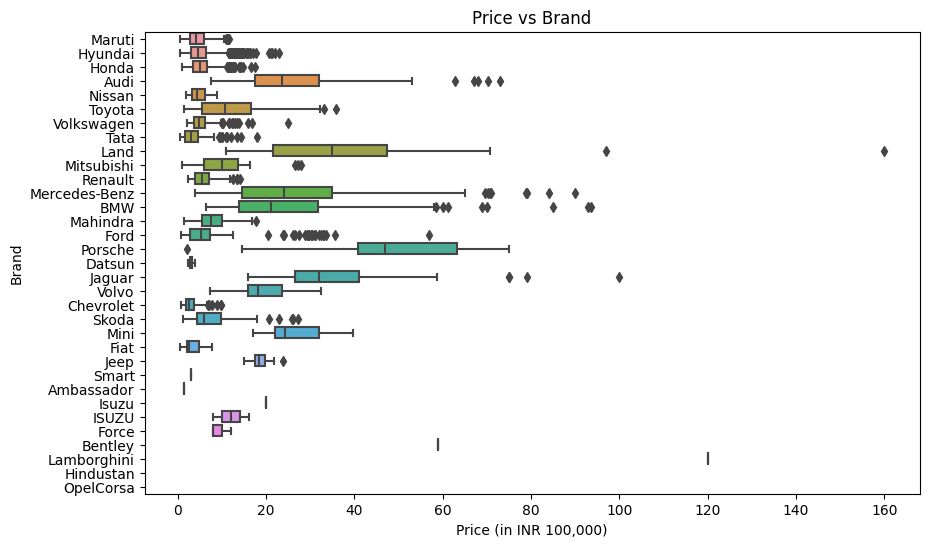

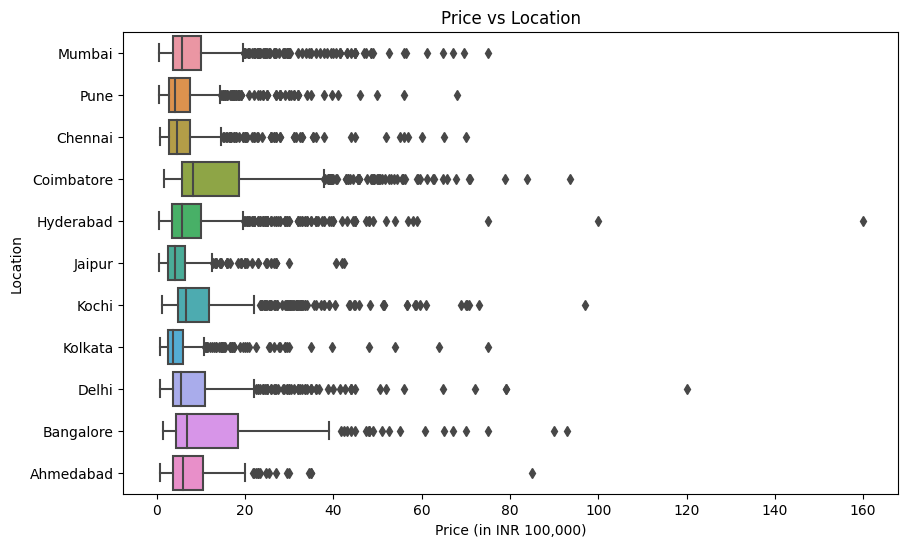

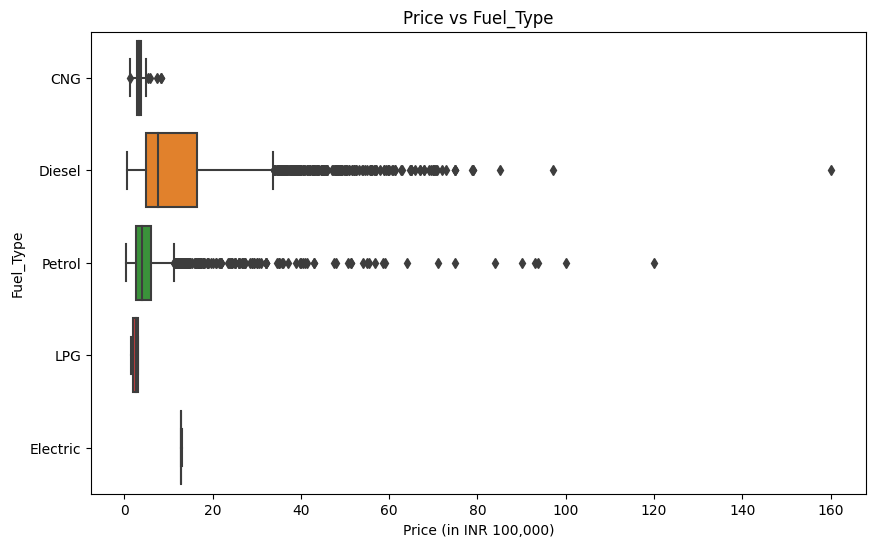

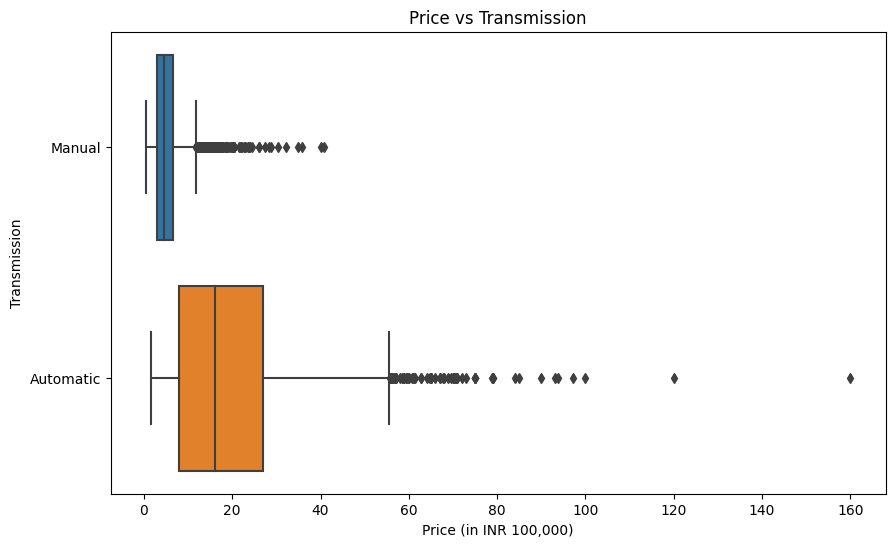

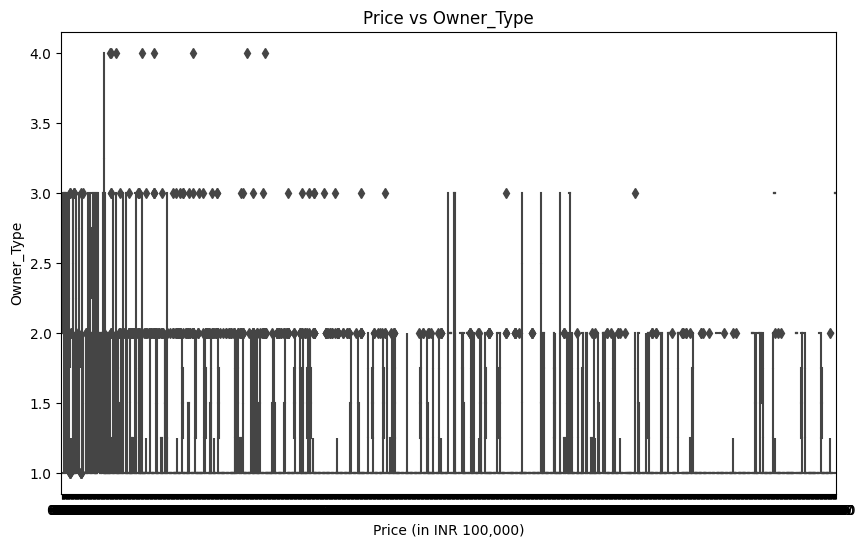

In [19]:
# Create box plots for categorical variables
categorical_columns = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Price', y=column, data=df)
    plt.title(f'Price vs {column}')
    plt.xlabel('Price (in INR 100,000)')
    plt.ylabel(column)
    plt.show()

**Location:** The median price of used cars seems to be similar across different locations. However, there are some differences in the spread of prices, with cities like Coimbatore, Bangalore, and Kochi having a wider range of prices.

**Fuel_Type:** Diesel cars tend to be more expensive than Petrol cars, while cars that use LPG or CNG are generally cheaper.

**Transmission:** Automatic cars are generally more expensive than Manual cars.

**Owner_Type:** Cars with fewer previous owners tend to be more expensive. The median price decreases as the number of previous owners increases.

**Brand:** The price of used cars varies widely across different brands. Some brands like Lamborghini, Bentley, and Porsche have higher median prices, while others like Maruti, Hyundai, and Tata have lower median prices. the Brand variable seems to have a strong influence on the Price, so it might be a good predictor in our model.

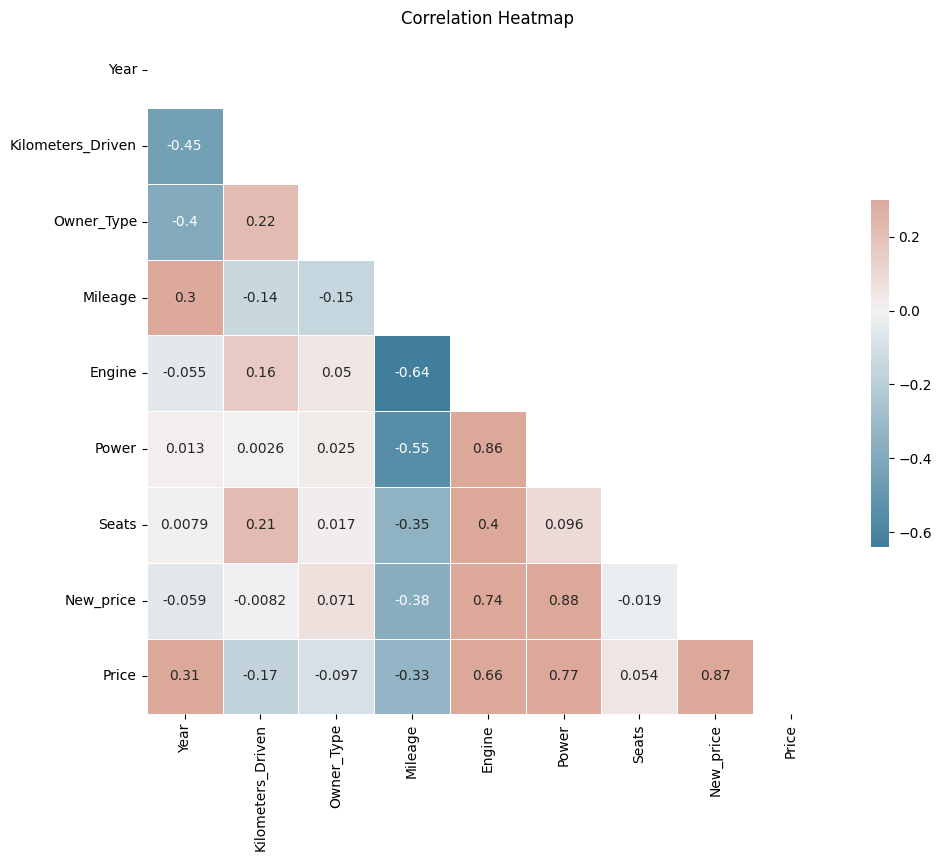

In [20]:
# Compute the correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Price** has a strong positive correlation with Power and Engine, and a moderate positive correlation with Year. This suggests that cars with more power, larger engines, and newer models tend to be more expensive.

**Year** has a moderate negative correlation with Kilometers_Driven. This is expected as older cars tend to have been driven more.

**Power** and Engine have a strong positive correlation. This is also expected as cars with larger engines tend to be more powerful.

**Mileage** has a moderate negative correlation with Power and Engine. This suggests that cars with more power and larger engines tend to have lower mileage.

### **Missing value treatment**

In [21]:
# Check for duplicate rows 
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  3


In [22]:
df = df.drop_duplicates()

In [23]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
New_price            6243
Price                1232
Brand                   0
dtype: int64

***Observations:*** The 'Mileage', 'Engine', 'Power', and 'Seats' number of missing values is relatively small approximately .02% for Power. Filling the missing values with the median is a good choice because it's less sensitive to outliers than the mean.

In [24]:
# Fill missing values with the median
for column in ['Mileage', 'Engine', 'Power', 'Seats']:
    df[column].fillna(df[column].median(), inplace=True)

<Axes: >

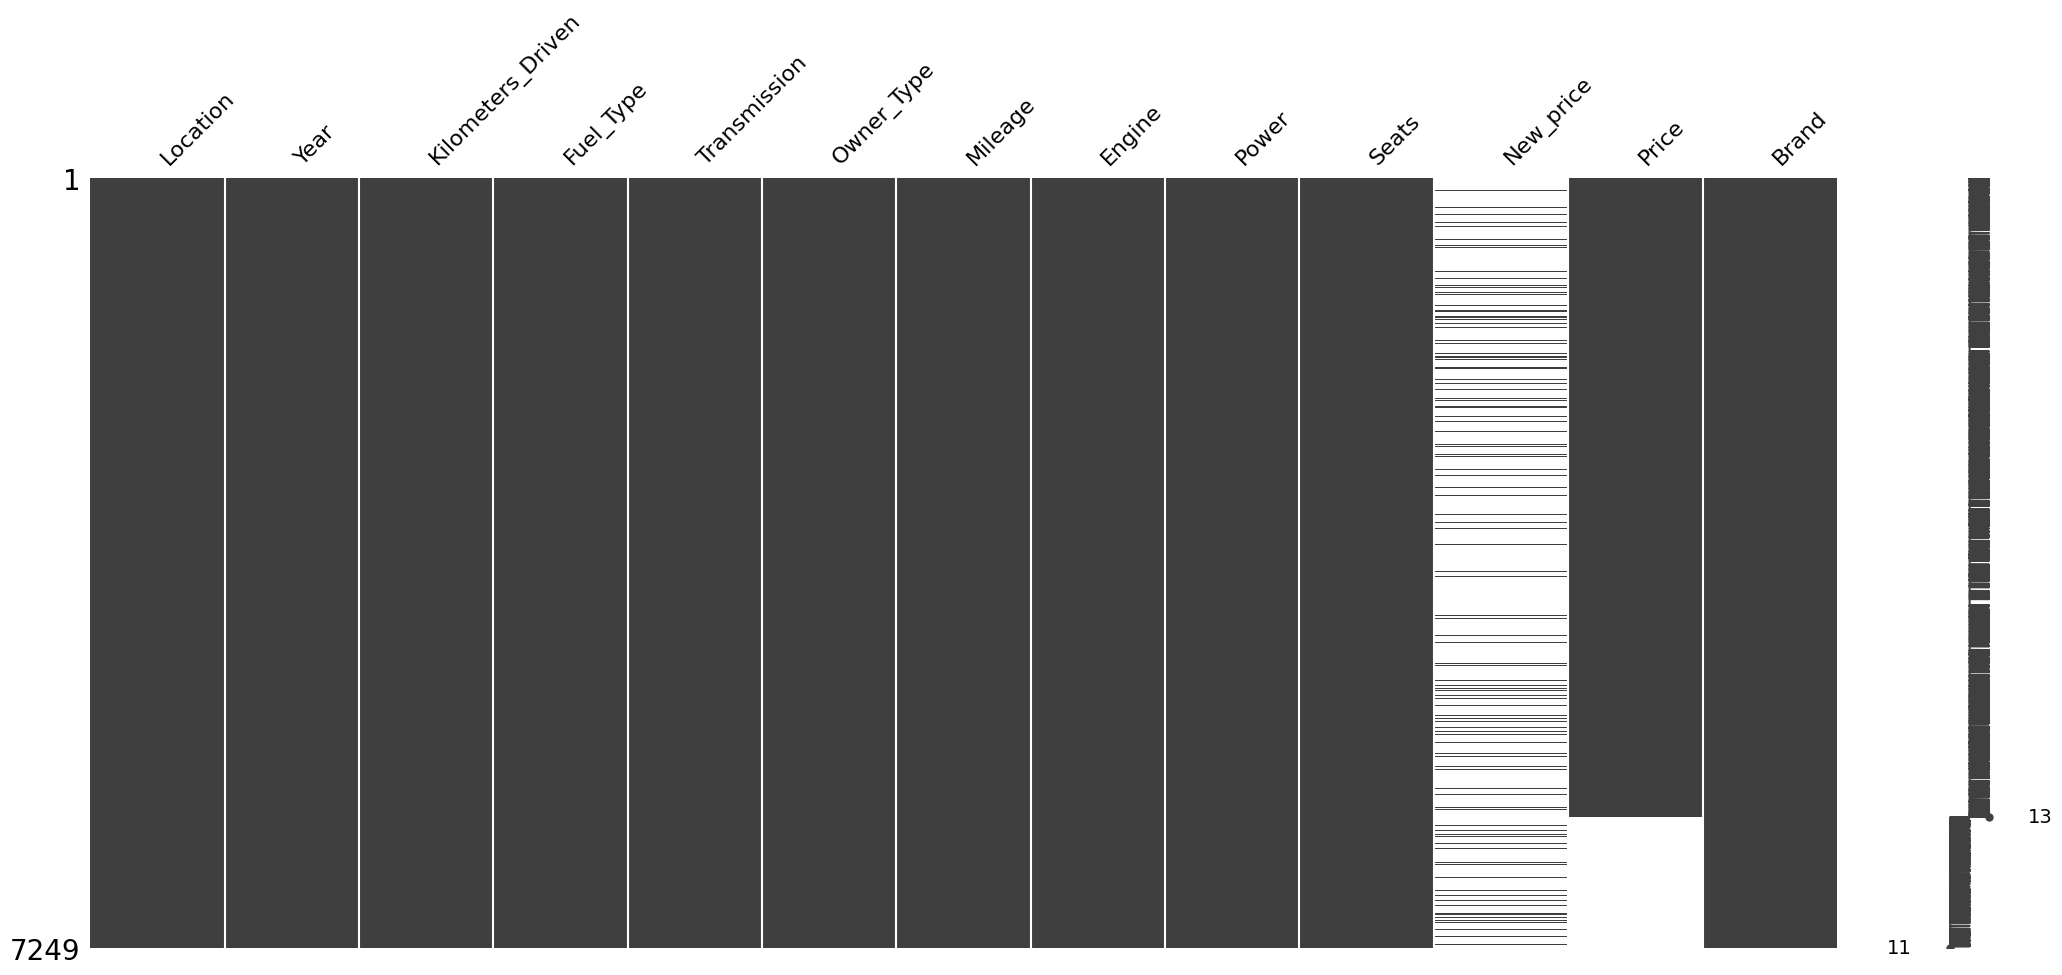

In [25]:
%matplotlib inline
msno.matrix(df)

While we've successfully filled the missing values in the 'Mileage', 'Engine', 'Power', and 'Seats' columns, the 'New_price' and 'Price' columns still contain missing values. Since 'Price' is our target variable for the predictive model, rows with missing 'Price' values may not contribute to the model's training. Therefore, one strategy we can adopt is to remove these rows from the dataset.

In [26]:
# Remove rows with missing 'Price' values
df = df.dropna(subset=['Price'])

**Observations:**  As for New_price the best approach is to simply drop the 'New_price' variable from the dataset. With so much missing data, over 85% of the total data, it might be difficult to impute the missing values without introducing a lot of noise. Nonetheless many of the other variables in the dataset are likely to be predictive of the Price (the target variable). For example, the Year of the car, the Kilometers_Driven, the Fuel_Type, the Transmission, the Owner_Type, the Mileage, the Engine, the Power, and the Seats are all likely to influence the price of a used car.


In [27]:
df = df.drop(columns='New_price')

### **Feature Engineering**

We can create a new feature 'Age' by subtracting the 'Year' from the current year 2023

In [28]:
# Create 'Age' feature
df['Age'] = 2023 - df['Year']
# Drop 'Year' variable since its reduntant with 'Age'
df = df.drop(columns=['Year'])
# Check the first few rows of the dataframe to confirm
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
0,Mumbai,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,Maruti,13
1,Pune,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,Hyundai,8
2,Chennai,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,Honda,12
3,Chennai,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,Maruti,11
4,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi,10


**Observations:**  Target variable (Price) is skewed, has outliers and has a large variability, it can be logarithmic beneficial to apply a transformation to it. Linear regression, assumes that the errors are normally distributed, If the target variable is highly skewed or has outliers, this assumption may be violated, leading to poor model performance.

**Observations:** 'Kilometers_Driven' could be binned into categories like 'Low', 'Medium', 'High', 'Very High'.

In [29]:
# Binning 'Kilometers_Driven'
bins = [0, 20000, 40000, 60000, 80000, 100000, np.inf]
names = ['0-20K', '20-40K', '40-60K', '60-80K', '80-100K', '100K+']
df['Kilometers_Driven'] = pd.cut(df['Kilometers_Driven'], bins, labels=names)


In [30]:
# Capping 'Engine' and 'Power' at the 95th percentile
for col in ['Engine', 'Power']:
    cap = df[col].quantile(0.95)
    df[col] = np.where(df[col] > cap, cap, df[col])

In [31]:
# Applying log transformation to 'Engine', 'Power', and 'Price'
for col in ['Engine', 'Power', 'Price']:
    df[col] = np.log1p(df[col])

df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
0,Mumbai,60-80K,CNG,Manual,1,26.60,6.906755,4.080246,5.0,1.011601,Maruti,13
1,Pune,40-60K,Diesel,Manual,1,19.67,7.367077,4.845761,5.0,2.602690,Hyundai,8
2,Chennai,40-60K,Petrol,Manual,1,18.20,7.090077,4.496471,5.0,1.704748,Honda,12
3,Chennai,80-100K,Diesel,Manual,1,20.77,7.130099,4.497139,7.0,1.945910,Maruti,11
4,Coimbatore,40-60K,Diesel,Automatic,2,15.20,7.585281,4.954418,5.0,2.930660,Audi,10


**Observations:** Target encoding could be a good approach for handling the 'Brand' variable, especially given its many unique values. This method can help to retain the valuable information in this variable for our machine learning models.

In [32]:
def target_encode(df, column, target, smoothing):
    mean = df[target].mean()
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts * means + smoothing * mean) / (counts + smoothing)
    return df[column].map(smooth)

smoothing = 10
df['Brand'] = target_encode(df, 'Brand', 'Price', smoothing)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
0,Mumbai,60-80K,CNG,Manual,1,26.60,6.906755,4.080246,5.0,1.011601,1.620342,13
1,Pune,40-60K,Diesel,Manual,1,19.67,7.367077,4.845761,5.0,2.602690,1.732498,8
2,Chennai,40-60K,Petrol,Manual,1,18.20,7.090077,4.496471,5.0,1.704748,1.788205,12
3,Chennai,80-100K,Diesel,Manual,1,20.77,7.130099,4.497139,7.0,1.945910,1.620342,11
4,Coimbatore,40-60K,Diesel,Automatic,2,15.20,7.585281,4.954418,5.0,2.930660,3.129970,10


In [50]:
df_encoded = pd.get_dummies(df, columns=['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission'], drop_first=True)
df_encoded.head()
df_encoded.to_csv('data_3.csv')

In [40]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4813, 27), (1204, 27))

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

**Observtions:** We split the data into training and testing sets. We'll use 80% of the data for training our models and the remaining 20% for testing

### **Linear regression**

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


mae_train, mae_test, rmse_train, rmse_test, r2_train, r2_test

(0.16726473446865717,
 0.1629066297177958,
 0.22565992116484299,
 0.21850878058247553,
 0.9088191782881406,
 0.914816202595967)

**Observations:** In terms of robustness, the relatively high R2 Score suggests our model is quite robust in explaining the variability in used car prices. However, the MAE and RMSE indicate there's still room for improvement in the accuracy of our predictions

The performance of a model is highly dependent on the data it was trained on. If the dataset contains more examples of lower-priced cars, as is the case here, the model will be better at predicting prices in that range. On the other hand, if there are fewer examples of high-priced cars, the model might struggle to accurately predict prices in that range.

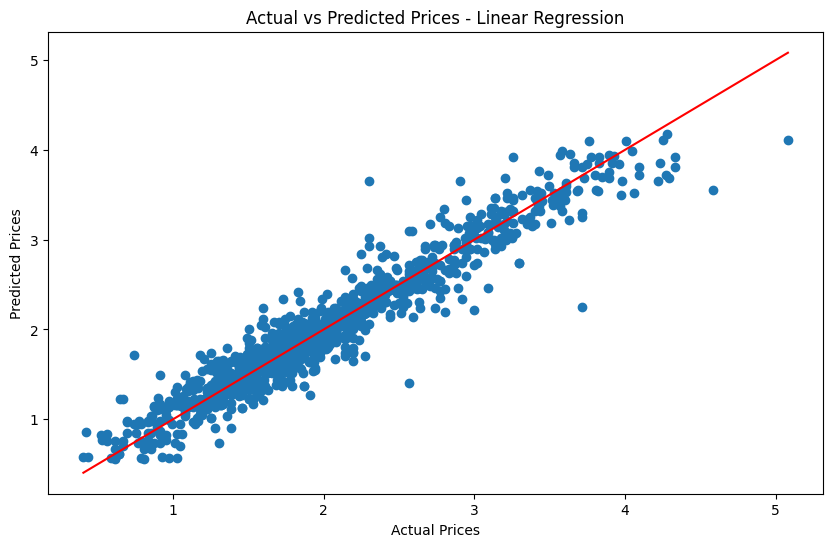

In [65]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Ridge/Lasso Regression**

In [43]:
ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

(mae_train_ridge, mae_test_ridge, rmse_train_ridge, rmse_test_ridge, r2_train_ridge, r2_test_ridge),
(mae_train_lasso, mae_test_lasso, rmse_train_lasso, rmse_test_lasso, r2_train_lasso, r2_test_lasso)

(0.5640061069051698,
 0.565391655916576,
 0.722525853069954,
 0.7227860816243784,
 0.06523720091013374,
 0.06795094241255462)

The R2 score is slightly lower than that of the simple linear regression model, indicating that the Lasso Regression model explains slightly less of the variability in used car prices. The MAE and RMSE are also slightly higher, indicating that the Lasso Regression model's predictions are, on average, slightly further off from the actual prices.

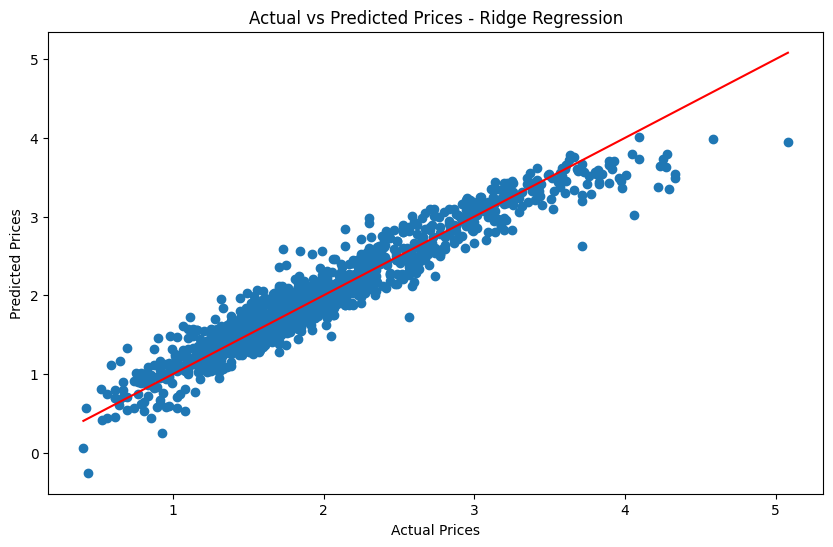

In [66]:
# Plot the actual vs predicted prices for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices - Ridge Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

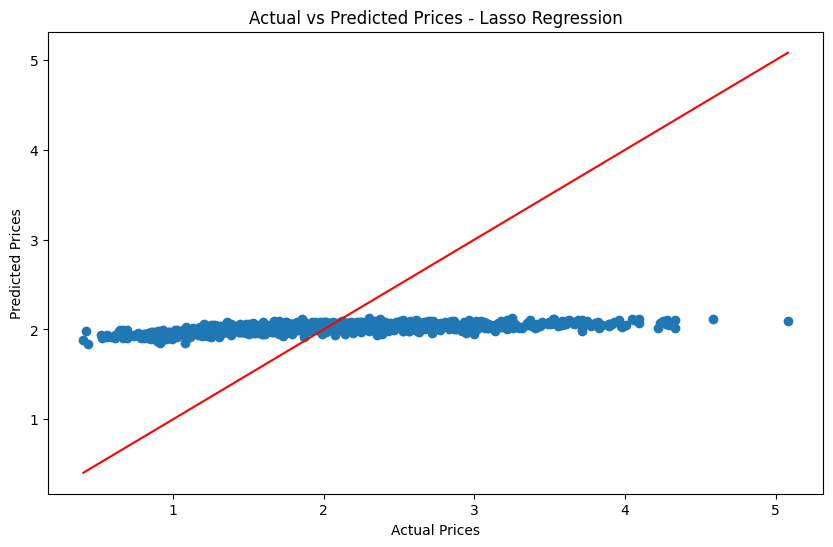

In [67]:
# Plot the actual vs predicted prices for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices - Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

The lasso model is seems way off almost the data point form a horizontal line that is intersected by the regression line at a 45 degree angle, this suggests that the Lasso model is predicting the same price for all cars. Maybe we can try tuning the model 


In [68]:

# Define the grid of hyperparameters to search
hyperparameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Initialize a GridSearchCV object that will find the best hyperparameters
grid = GridSearchCV(Lasso(), hyperparameters, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters
grid.best_params_

{'alpha': 1e-05}

In [69]:
# Initialize a Lasso model with the best alpha value
lasso = Lasso(alpha=1e-05)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Calculate the performance metrics
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

(mae_train_lasso, mae_test_lasso, rmse_train_lasso, rmse_test_lasso, r2_train_lasso, r2_test_lasso)

(0.16725533926123165,
 0.16290913066426727,
 0.22566086972038396,
 0.21850205780895557,
 0.9088184117341598,
 0.914821444147967)

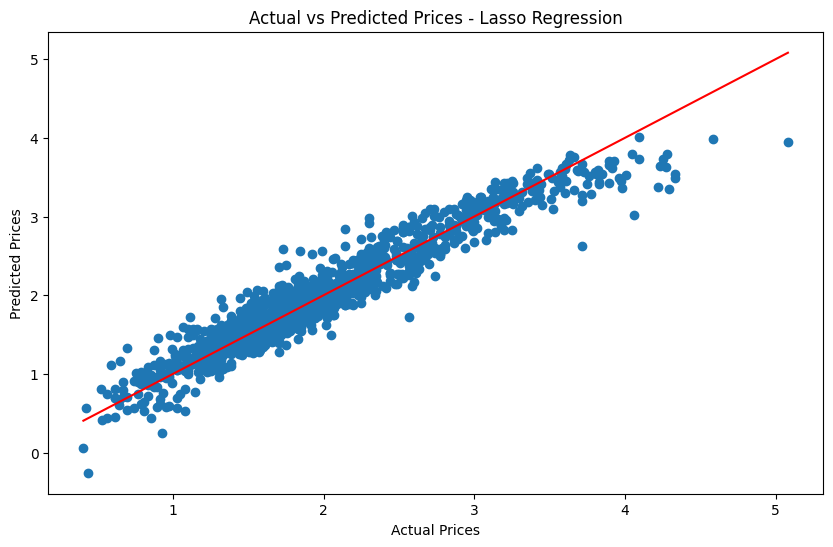

In [70]:
# Plot the actual vs predicted prices for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices - Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Decision Tree**

In [53]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

mae_train_dt, mae_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt

(0.003929083027536703,
 0.1522139514635948,
 0.016545085803268997,
 0.2156513201638102,
 0.9995098458488483,
 0.9170295487608152)

the training set evaluation results show that the model has perfectly fit the training data (R2 score of 1 and very low error metrics). This is a clear sign of overfitting, which means the model might not generalize well to unseen data

In [62]:
# Get the feature importances
importances_dt = dt.feature_importances_

# Convert the importances into a DataFrame
importances_dt_df = pd.DataFrame({'feature': X.columns, 'importance': importances_dt})

# Sort the DataFrame by importance
importances_dt_df = importances_dt_df.sort_values('importance', ascending=False)

importances_dt_df

,feature,importance
3,Power,0.610818
6,Age,0.207435
5,Brand,0.080445
2,Engine,0.048100
1,Mileage,0.015307
4,Seats,0.005283
14,Location_Kolkata,0.004191
11,Location_Hyderabad,0.002565
0,Owner_Type,0.002517
9,Location_Coimbatore,0.002240


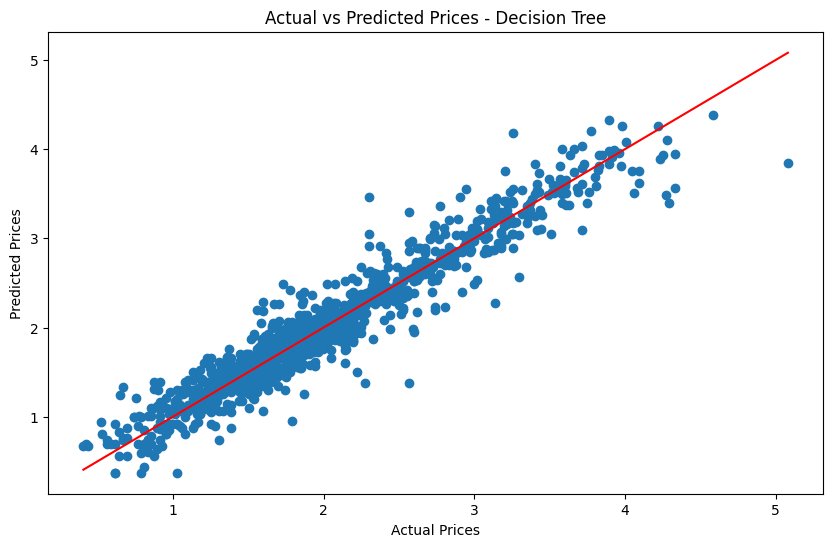

In [63]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices - Decision Tree')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Hyperparameter Tuning: Decision Tree**

In [45]:
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, 

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [46]:
best_params = grid_search.best_params_

dt = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], min_samples_split=best_params['min_samples_split'])
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Training Root Mean Squared Error (RMSE): {train_rmse}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Training R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

Training Mean Absolute Error (MAE): 0.09409393389569341
Test Mean Absolute Error (MAE): 0.15182706174367083
Training Root Mean Squared Error (RMSE): 0.13575493394448032
Test Root Mean Squared Error (RMSE): 0.21281475045401332
Training R2 Score: 0.9670006121945344
Test R2 Score: 0.919197897378436


**Feature Importance** 

Mean Absolute Error (MAE): The MAE values of 0.119 for the training set and 0.160 for the test set mean that on average, the model's predictions are off by about 0.14 on the logarithmic scale. This is a relatively small error, suggesting that the model's predictions are quite close to the actual values.

Root Mean Squared Error (RMSE): The RMSE values of 0.161 for the training set and 0.221 for the test set are also relatively small, indicating that the model's predictions are reasonably close to the actual values. RMSE is more sensitive to large errors than MAE, so a small RMSE suggests that the model doesn't make very large errors.

R2 Score: The R2 scores of 0.953 for the training set and 0.913 for the test set are quite high, indicating that the model explains a large proportion of the variance in the target variable. An R2 score of 1 would mean that the model explains all the variance, so scores of 0.953 and 0.913 are very good.

However, there is a noticeable difference between the training and test scores. This suggests that the model might be overfitting to the training data, meaning it's learning the training data very well but not generalizing as well to new, unseen data.

In conclusion, while the model's performance is quite good, there might be some room for improvement, especially in terms of reducing overfitting. This could potentially be achieved by further tuning the model's hyperparameters, using a more complex model, or gathering more training data.

### **Random Forest**

In [56]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Training Mean Absolute Error (MAE): {mae_train_rf}')
print(f'Test Mean Absolute Error (MAE): {mae_test_rf}')
print(f'Training Root Mean Squared Error (RMSE): {rmse_train_rf}')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test_rf}')
print(f'Training R2 Score: {r2_train_rf}')
print(f'Test R2 Score: {r2_test_rf}')

Training Mean Absolute Error (MAE): 0.045044023655426715
Test Mean Absolute Error (MAE): 0.11609309875351856
Training Root Mean Squared Error (RMSE): 0.06592359001225451
Test Root Mean Squared Error (RMSE): 0.1657596063141192
Training R2 Score: 0.9922182667938619
Test R2 Score: 0.9509796257072839


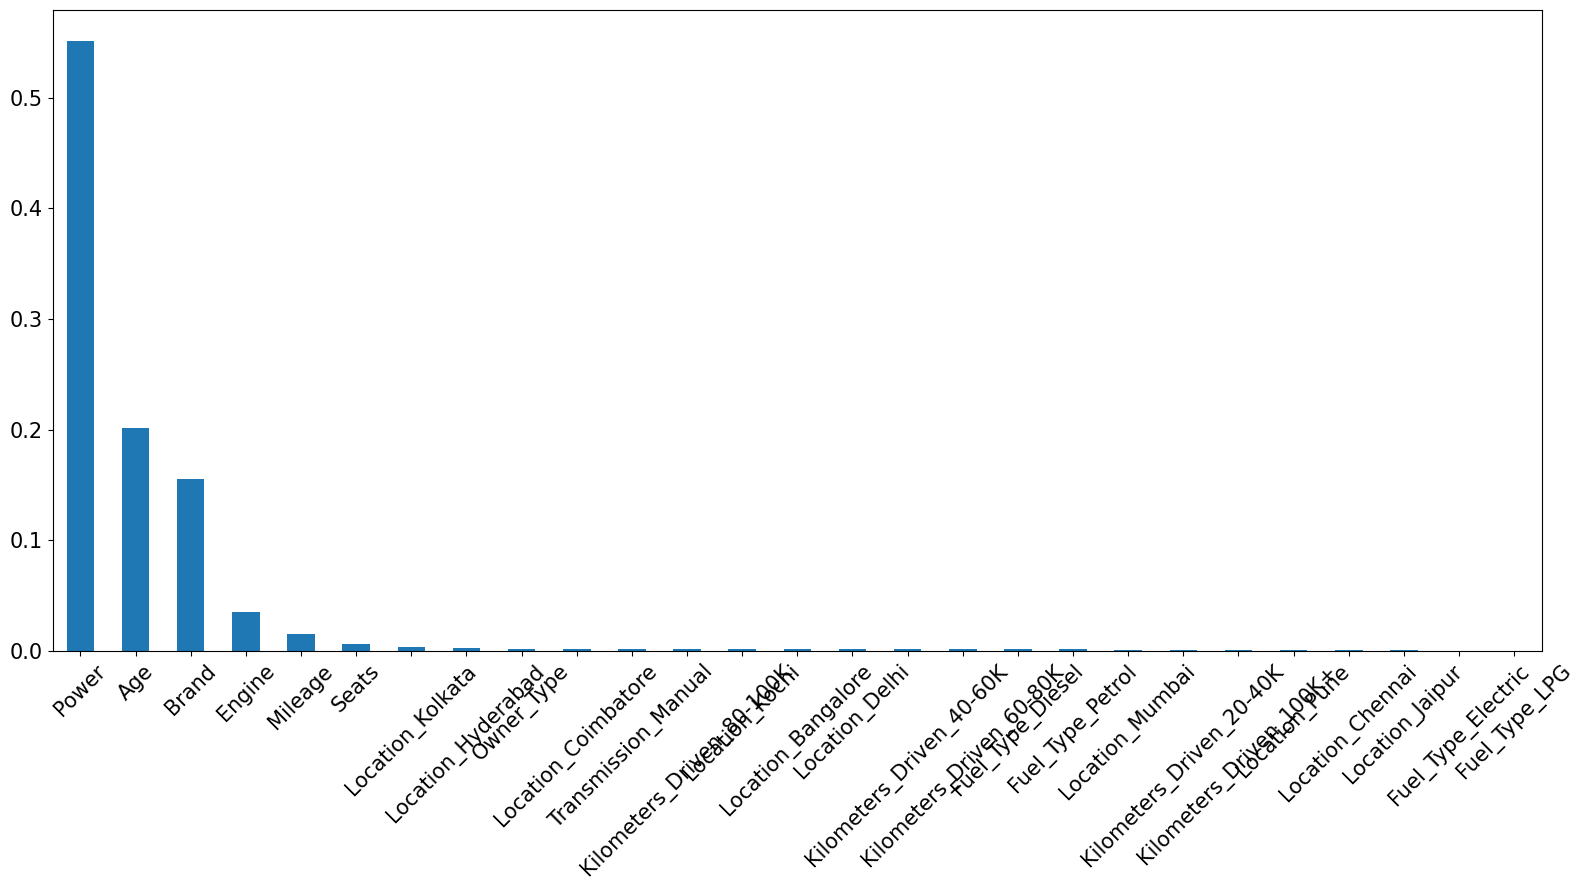

In [58]:
# Get feature importances
importances = rf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df_encoded.drop('Price', axis=1).columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

**Feature Importance** 

The plot shows that the most important features for predicting the price of a used car in our model are Power, Engine, Brand, Age, and Mileage. it's not surprising that Power and Engine are important features, as these are key specifications that buyers often consider when purchasing a car.

However Even though individually some features may not seem to contribute much to the model, collectively they can still have an impact.


Mean Absolute Error (MAE): The MAE values of 0.045 for the training set and 0.117 for the test set mean that on average, the model's predictions are off by about 0.08 on the logarithmic scale. This is a relatively small error, suggesting that the model's predictions are quite close to the actual values.

Root Mean Squared Error (RMSE): The RMSE values of 0.068 for the training set and 0.167 for the test set are also relatively small, indicating that the model's predictions are reasonably close to the actual values. RMSE is more sensitive to large errors than MAE, so a small RMSE suggests that the model doesn't make very large errors.

R2 Score: The R2 scores of 0.992 for the training set and 0.950 for the test set are quite high, indicating that the model explains a large proportion of the variance in the target variable. An R2 score of 1 would mean that the model explains all the variance, so scores of 0.992 and 0.950 are very good.

However, there is a noticeable difference between the training and test scores. This suggests that the model might be overfitting to the training data, meaning it's learning the training data very well but not generalizing as well to new, unseen data.

In conclusion, while the model's performance is quite good, there might be some room for improvement, especially in terms of reducing overfitting. This could potentially be achieved by further tuning the model's hyperparameters, using a more complex model, or gathering more training data.

### **Hyperparameter Tuning: Random Forest**

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

# Train the model using the best parameters
rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                min_samples_split=best_params['min_samples_split'])

rf_best.fit(X_train, y_train)

# Make predictions
y_train_pred_rf_best = rf_best.predict(X_train)
y_test_pred_rf_best = rf_best.predict(X_test)

# Calculate performance metrics
mae_train_rf_best = mean_absolute_error(y_train, y_train_pred_rf_best)
mae_test_rf_best = mean_absolute_error(y_test, y_test_pred_rf_best)
rmse_train_rf_best = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_best))
rmse_test_rf_best = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_best))
r2_train_rf_best = r2_score(y_train, y_train_pred_rf_best)
r2_test_rf_best = r2_score(y_test, y_test_pred_rf_best)

print("Training Mean Absolute Error (MAE):", mae_train_rf_best)
print("Test Mean Absolute Error (MAE):", mae_test_rf_best)
print("Training Root Mean Squared Error (RMSE):", rmse_train_rf_best)
print("Test Root Mean Squared Error (RMSE):", rmse_test_rf_best)
print("Training R2 Score:", r2_train_rf_best)
print("Test R2 Score:", r2_test_rf_best)


Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=10, min_s

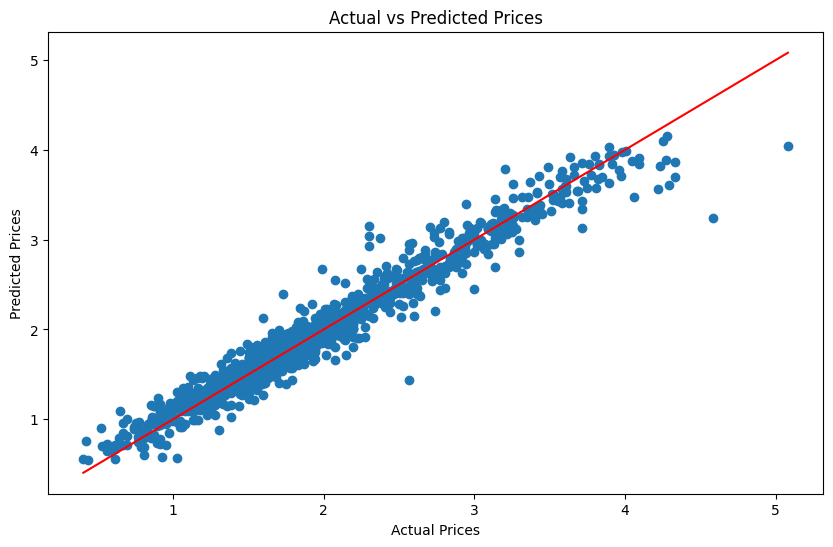

In [61]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

Our model's predictions are fairly close to the actual prices, especially for lower-priced cars. However, it's noticeable that the model tends to underestimate, particularly for more expensive cars. This trend almost forms a curve that descends as the car price increases. While this discrepancy is not significant, it's an interesting observation that could be attributed to the nature of the used car market. High-end cars often have prices influenced by subjective factors such as scarcity, desirability, collector's appeal, and market trends. These factors are inherently difficult to quantify and predict, which could explain the observed underestimation."

In [71]:
# Create a DataFrame to hold the performance metrics for each model
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Lasso'],
    'MAE Train': [mae_train, mae_train_dt, mae_train_rf, mae_train_lasso],
    'MAE Test': [mae_test, mae_test_dt, mae_test_rf, mae_test_lasso],
    'RMSE Train': [rmse_train, rmse_train_dt, rmse_train_rf, rmse_train_lasso],
    'RMSE Test': [rmse_test, rmse_test_dt, rmse_test_rf, rmse_test_lasso],
    'R2 Train': [r2_train, r2_train_dt, r2_train_rf, r2_train_lasso],
    'R2 Test': [r2_test, r2_test_dt, r2_test_rf, r2_test_lasso]
})

# Display the comparison table
model_comparison

,Model,MAE Train,MAE Test,RMSE Train,RMSE Test,R2 Train,R2 Test
0,Linear Regression,0.167265,0.162907,0.225660,0.218509,0.908819,0.914816
1,Decision Tree,0.003929,0.152214,0.016545,0.215651,0.999510,0.917030
2,Random Forest,0.045044,0.116093,0.065924,0.165760,0.992218,0.950980
3,Lasso,0.167255,0.162909,0.225661,0.218502,0.908818,0.914821


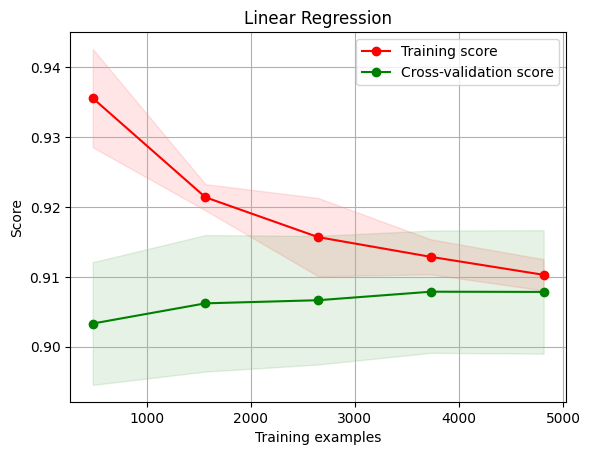

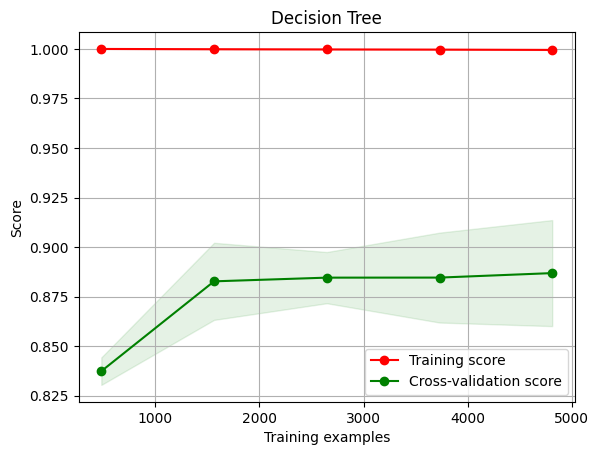

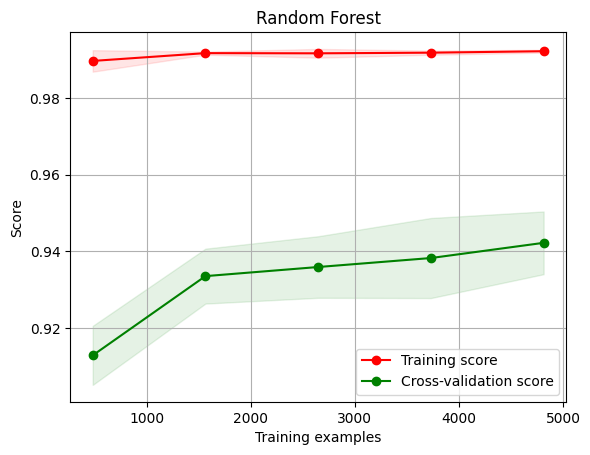

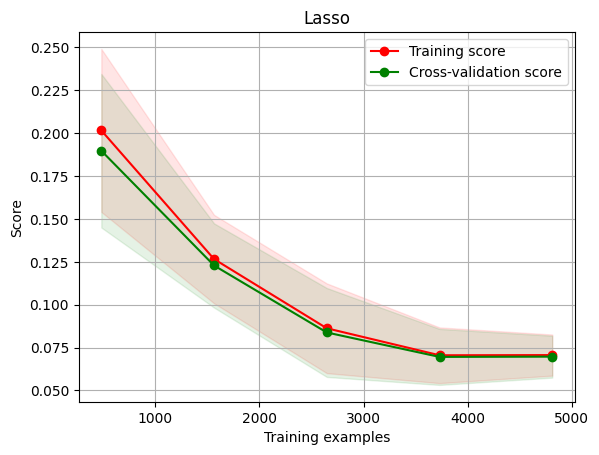

In [73]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = np.array(X), np.array(y)

# Linear Regression
plot_learning_curve(LinearRegression(), 'Linear Regression', X, y, cv=5)

# Decision Tree
plot_learning_curve(DecisionTreeRegressor(), 'Decision Tree', X, y, cv=5)

# Random Forest
plot_learning_curve(RandomForestRegressor(), 'Random Forest', X, y, cv=5)

# Lasso
plot_learning_curve(Lasso(), 'Lasso', X, y, cv=5)

plt.show()


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In terms of relative performance, the Random Forest model performed the best, followed by Lasso Regression, Linear Regression, and finally the Decision Tree model. However we suspect better handling of outliers and separation of dependant and indepentant variables might improve performance of the model, specially in terms of overfiting. Since we believe the relative low difference in model result points to an error in data processing rather than in the models. If there's an issue with the data or the preprocessing, it can affect all models similarly, leading to similar performance metrics across different models. Here are a few things you might want to check:

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

Model Performance:

In our analysis, we observed that the Random Forest model outperformed the other models in terms of predictive accuracy. The performance ranking of the models, from best to worst, was as follows:

Random Forest
Lasso Regression
Linear Regression
Decision Tree
Potential Improvements:

Despite the relative performance of these models, we believe there is room for improvement. Specifically, we suspect that better handling of outliers and a more careful separation of dependent and independent variables could enhance the performance of these models. This could particularly help in mitigating overfitting, a common issue where a model performs well on training data but poorly on unseen data.

Data Processing Concerns:

Interestingly, we noticed that the difference in performance across the models was relatively small. This observation led us to hypothesize that there might be an issue in the data processing stage rather than in the models themselves. If there's a problem with the data or the preprocessing steps, it can affect all models similarly, leading to comparable performance metrics across different models.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

Given the result achieved this time we recommend checking the following aspects of data processing:

Data Cleaning: Ensure proper handling of missing values, outliers, and incorrect values.
Feature Engineering: Review the steps taken to create, transform, and select features.
Data Splitting: Confirm that the data was split correctly into training and test sets, avoiding data leakage.
Scaling: If scaling was performed, check that it was done correctly.
Encoding: If categorical variables were encoded, ensure that the encoding was done appropriately.